In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random


In [5]:
SEED = 20240102
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Test samples: (10000, 28, 28)


In [7]:
# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history1 = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6686 - loss: 0.9119 - val_accuracy: 0.8438 - val_loss: 0.4048
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8357 - loss: 0.4591 - val_accuracy: 0.8642 - val_loss: 0.3631
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8613 - loss: 0.3902 - val_accuracy: 0.8810 - val_loss: 0.3207
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8744 - loss: 0.3534 - val_accuracy: 0.8905 - val_loss: 0.2926
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8833 - loss: 0.3243 - val_accuracy: 0.8920 - val_loss: 0.2847
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8906 - loss: 0.3010 - val_accuracy: 0.9010 - val_loss: 0.2644
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8974 - loss: 0.2813 - val_accuracy: 0.9025 - val_loss: 0.2604
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9036 - loss: 0.2632 - val_accuracy: 0

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.9034 - loss: 0.2579

Test Accuracy: 90.34%


In [12]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [13]:
history2 = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9194 - loss: 0.2196 - val_accuracy: 0.9158 - val_loss: 0.2350
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9223 - loss: 0.2087 - val_accuracy: 0.9195 - val_loss: 0.2350
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9270 - loss: 0.1998 - val_accuracy: 0.9183 - val_loss: 0.2303
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9290 - loss: 0.1931 - val_accuracy: 0.9160 - val_loss: 0.2401
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9292 - loss: 0.1901 - val_accuracy: 0.9178 - val_loss: 0.2402
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9315 - loss: 0.1816 - val_accuracy: 0.9183 - val_loss: 0.2444
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9347 - loss: 0.1769 - val_accuracy: 0.9185 - val_loss: 0.2406
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9346 - loss: 0.1709 - val_accuracy: 0

In [14]:
# Predict first 10 test images
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(10):
    print(f"Image {i}: Predicted = {class_names[predicted_labels[i]]}, True = {class_names[y_test[i]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
Image 0: Predicted = Ankle boot, True = Ankle boot
Image 1: Predicted = Pullover, True = Pullover
Image 2: Predicted = Trouser, True = Trouser
Image 3: Predicted = Trouser, True = Trouser
Image 4: Predicted = Shirt, True = Shirt
Image 5: Predicted = Trouser, True = Trouser
Image 6: Predicted = Coat, True = Coat
Image 7: Predicted = Shirt, True = Shirt
Image 8: Predicted = Sandal, True = Sandal
Image 9: Predicted = Sneaker, True = Sneaker


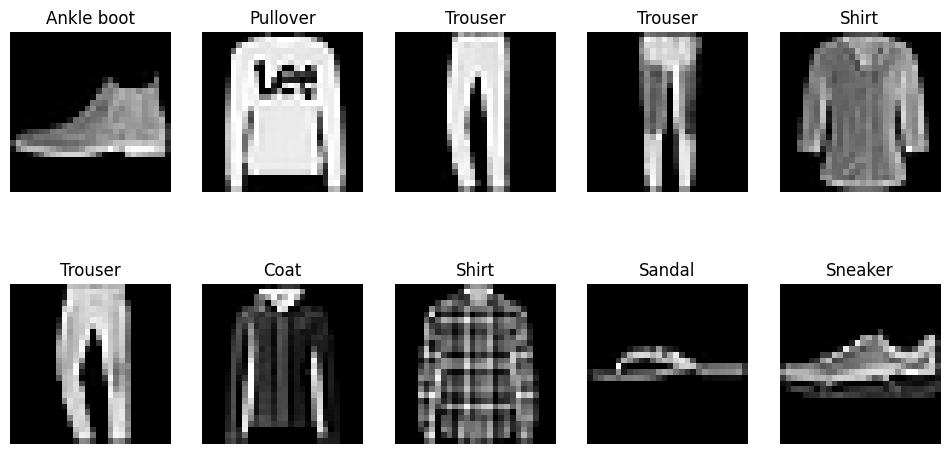

In [16]:
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(class_names[predicted_labels[i]])
    plt.axis('off')

plt.show()


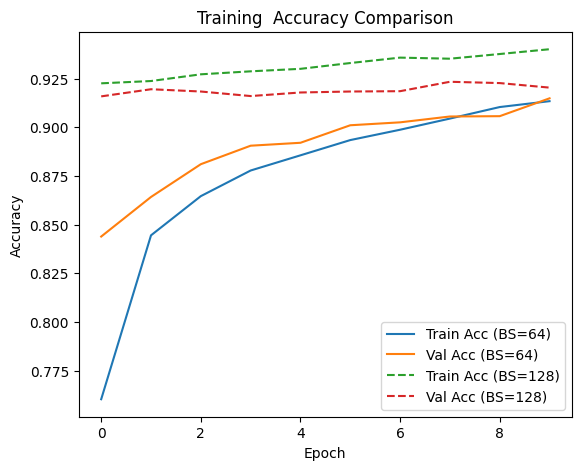

In [17]:


plt.figure(figsize=(14,5))

# -------- Accuracy Curves --------
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Train Acc (BS=64)')
plt.plot(history1.history['val_accuracy'], label='Val Acc (BS=64)')
plt.plot(history2.history['accuracy'], label='Train Acc (BS=128)', linestyle='--')
plt.plot(history2.history['val_accuracy'], label='Val Acc (BS=128)', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training  Accuracy Comparison')
plt.legend()

# -------- Loss Curves --------


plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x1000 with 0 Axes>

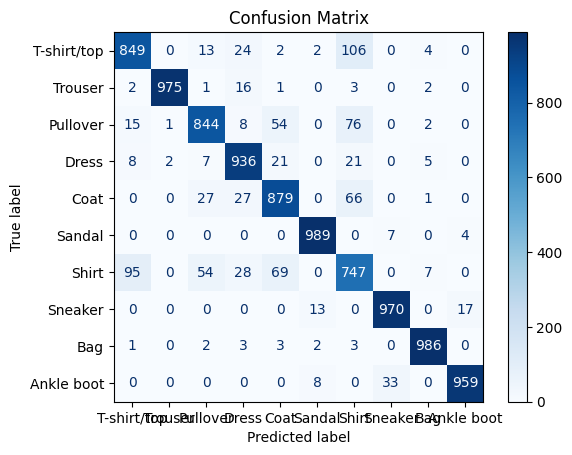

In [18]:
# Import required libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Predict classes on test set
y_pred_probs = model.predict(x_test)           # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)            # predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[
                                  "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
                              ])
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
